# Health Care Case Study : Part 2

### Identify the three providers that are least similar to other providers and the the three regions that 
### are least similar to other region

2.1 Identify the three providers that are least similar to other providers

In [58]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

import scipy.stats as stats
import pandas_profiling as pp

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [59]:
Provider_Charge_In = pd.read_csv('Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')
Provider_Charge_Out = pd.read_csv('Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv')

In [3]:
# For the Data pro-processing, will generate pandas profiling report to get a clear picture of the data.

In [4]:
Provider_Charge_In_Profile= pp.ProfileReport(Provider_Charge_In)

KeyboardInterrupt: 

In [ ]:
Provider_Charge_In_Profile

In [ ]:
# Based on the above report we see, there are no missing or null values in the data also 'Average Medicare Payments' 
# is highly co-related with 'Average Total Payments' so we can conside only one of the variable for analysis purpose.

In [ ]:
Provider_Charge_Out_Profile= pp.ProfileReport(Provider_Charge_Out)
Provider_Charge_Out_Profile

In [ ]:
# Based on the above Outpatient report, there are no missing/ null values and also no  Co-relation between any features. Hence no need to treat missing/null values.

In [60]:
# Data Manipulation and Feature engineering Steps:

# Based on the inpatient profile reports, there are no missing or null values in the data also 'Average Medicare Payments' 
# is highly co-related with 'Average Total Payments' so we can drop one of the variable for analysis purpose. Also, id, zip code, address and city is not needed. 

Provider_Charge_In.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                                163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
Total Discharges                              163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
Average Medicare Payments                     163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.9+ M

* For the analysis purpose we will consider the below columns from Provider_Charge_In based on the profile report summary.
    
    Columns: DRG Definition, Provider Name, Provider State, Hospital Referral Region (HRR) Description, Total Discharges, Average Covered Charges and Average Total Payments




In [61]:
# Renaming columns for Inpatients and Outpatients

Provider_Charge_In.rename(columns = {'DRG Definition': 'Procedure', 
                                    'Provider Name': 'Provider',
                                     'Provider State': 'State',
                                     'Hospital Referral Region (HRR) Description' : 'Region',
                                     'Total Discharges': 'Service_Count',
                                     'Average Covered Charges': 'Charges',
                                     'Average Total Payments':'Payments'
                                    }, inplace= True)

In [62]:
Provider_Charge_In_Final= Provider_Charge_In[['Procedure','Provider','State','Region','Service_Count','Charges','Payments']]
Provider_Charge_In_Final.head()

,Procedure,Provider,State,Region,Service_Count,Charges,Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,91,32963.07692,5777.241758
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MARSHALL MEDICAL CENTER SOUTH,AL,AL - Birmingham,14,15131.85714,5787.571429
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ELIZA COFFEE MEMORIAL HOSPITAL,AL,AL - Birmingham,24,37560.37500,5434.958333
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST VINCENT'S EAST,AL,AL - Birmingham,25,13998.28000,5417.560000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SHELBY BAPTIST MEDICAL CENTER,AL,AL - Birmingham,18,31633.27778,5658.333333


In [63]:
Provider_Charge_Out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


In [64]:
Provider_Charge_Out.rename(columns = {'APC': 'Procedure', 
                                    'Provider Name': 'Provider',
                                     'Provider State': 'State',
                                     'Hospital Referral Region (HRR) Description' : 'Region',
                                     'Outpatient Services': 'Service_Count',
                                     'Average  Estimated Submitted Charges': 'Charges',
                                     'Average Total Payments':'Payments'
                                    }, inplace= True)

In [65]:
Provider_Charge_Out_Final= Provider_Charge_Out[['Procedure','Provider','State','Region','Service_Count','Charges','Payments']]
Provider_Charge_Out_Final.head()

,Procedure,Provider,State,Region,Service_Count,Charges,Payments
0,0012 - Level I Debridement & Destruction,EAST ALABAMA MEDICAL CENTER AND SNF,AL,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,CENTRAL PENINSULA GENERAL HOSPITAL,AK,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",AZ,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,BANNER BAYWOOD MEDICAL CENTER,AZ,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",AZ,AZ - Tucson,22,152.045455,16.569091


In [66]:
# Merge the data 
Provider_Charge= pd.concat([Provider_Charge_In_Final,Provider_Charge_Out_Final])
Provider_Charge.head()

,Procedure,Provider,State,Region,Service_Count,Charges,Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,91,32963.07692,5777.241758
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MARSHALL MEDICAL CENTER SOUTH,AL,AL - Birmingham,14,15131.85714,5787.571429
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ELIZA COFFEE MEMORIAL HOSPITAL,AL,AL - Birmingham,24,37560.37500,5434.958333
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST VINCENT'S EAST,AL,AL - Birmingham,25,13998.28000,5417.560000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SHELBY BAPTIST MEDICAL CENTER,AL,AL - Birmingham,18,31633.27778,5658.333333


In [67]:
Provider_Charge['Charges']=Provider_Charge['Charges'].round(2)

In [68]:
Provider_Charge['Payments']=Provider_Charge['Payments'].round(2)

In [69]:
# Check for the null values
Provider_Charge.isnull().any()

Procedure        False
Provider         False
State            False
Region           False
Service_Count    False
Charges          False
Payments         False
dtype: bool

In [70]:
Provider_Charge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 43371
Data columns (total 7 columns):
Procedure        206437 non-null object
Provider         206437 non-null object
State            206437 non-null object
Region           206437 non-null object
Service_Count    206437 non-null int64
Charges          206437 non-null float64
Payments         206437 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 12.6+ MB


***************************************************
*    In this analysis , we need to find out the features which are similar to few fearues and non similar to few other  features. 

*    It means, we can devide these features into multiple clusters and then can find out the similarity /dis-similarity between cluters.

*    Also As we see there are no outliers in the data so, for this purpose, I am choosing K-mean Clusting exploratory data analysis technique.

***************************************************

##### Part 2A: Providers least like others

In [71]:
# Now, as we have 4 categorical variables , we can go for one hot encoding to converet those to continues variables. 
# but as opting this approach will unnecessary increase the featues in the data set, we can choose to group the data 
# and apply the algorithm.

# Group the data based on Providers

Provider_Charge_group= Provider_Charge.groupby('Provider').agg({'Procedure':'nunique',
                                        'State':'nunique',
                                        'Region':'nunique',
                                         'Service_Count':'sum',
                                         'Charges':'sum',
                                         'Payments':'sum'
                                        }).reset_index()
Provider_Charge_group.head()

,Provider,Procedure,State,Region,Service_Count,Charges,Payments
0,ABBEVILLE GENERAL HOSPITAL,25,1,1,1294,314058.89,121115.80
1,ABBOTT NORTHWESTERN HOSPITAL,121,1,1,20810,4495571.85,1065438.89
2,ABILENE REGIONAL MEDICAL CENTER,71,1,1,7285,3613719.38,516580.33
3,ABINGTON MEMORIAL HOSPITAL,121,1,1,19300,6832266.25,1027582.36
4,ACMH HOSPITAL,54,1,1,4151,406719.05,199332.50


In [72]:
# Before applying the algorithm , standardize the data (so that all the values are in the same scale )using StandardScaler or MinMaxScaler
# select the colums which needs to be used
Provider_Charge_group_numerical= Provider_Charge_group.select_dtypes(include= ['int', 'float']).copy()

In [73]:
Provider_Charge_group_numerical.head(2)

,Procedure,State,Region,Service_Count,Charges,Payments
0,25,1,1,1294,314058.89,121115.80
1,121,1,1,20810,4495571.85,1065438.89


In [74]:
sc= StandardScaler()

In [75]:
sc_model= sc.fit_transform(Provider_Charge_group_numerical)
sc_model

array([[-1.02133637, -0.13116678, -0.12407333, -0.42405578, -0.79303483,
        -0.872222  ],
       [ 1.61134588, -0.13116678, -0.12407333,  0.51086368,  1.35101558,
         1.31256311],
       [ 0.24015721, -0.13116678, -0.12407333, -0.13705524,  0.89885002,
         0.04272441],
       ...,
       [-1.54238806, -0.13116678, -0.12407333, -0.47948219, -0.93054422,
        -1.01445851],
       [ 1.09029418, -0.13116678, -0.12407333,  0.06754821,  0.66716892,
         0.93237595],
       [-1.67950693, -0.13116678, -0.12407333, -0.48527872, -0.95028024,
        -1.13045448]])

In [76]:
# Now apply PCA, as we dont know the number of PCs will go with the same # of components as Columns.
pca_model = PCA(n_components=6)

In [77]:
# fit the standardize model
pca_model= pca_model.fit(sc_model)  

In [78]:
pca_model.explained_variance_

array([3.3887584 , 1.56871252, 0.72007953, 0.22353427, 0.08325248,
       0.0175378 ])

In [79]:
# check the variance ratio
pca_model.explained_variance_ratio_

array([0.56461662, 0.26137041, 0.11997576, 0.03724407, 0.01387108,
       0.00292205])

In [80]:
# Find the cumulative ratio
np.cumsum(pca_model.explained_variance_ratio_)

array([0.56461662, 0.82598703, 0.9459628 , 0.98320687, 0.99707795,
       1.        ])

In [81]:
# based on the above cumulative sum, we can see that 3 clusters are defining approx 95% of the data. So wll go with
# 3 PCs.
pca_model= PCA(n_components=3)
pca_model= pca_model.fit_transform(sc_model)

In [82]:
#reduced_cr=pca_model.transform(sc_model)

In [83]:
#PCs = pd.DataFrame(pca_model.transform(sc_model), columns = ['PC1','PC2','PC3'])
PCs = pd.DataFrame(pca_model, columns = ['PC1','PC2','PC3'])

In [84]:
PCs

,PC1,PC2,PC3
0,-1.464218,0.668714,0.199495
1,2.042147,-1.403951,-0.536484
2,0.410835,-0.369039,-0.515058
3,2.533271,-1.573796,-1.013894
4,-0.969895,0.272635,0.124053
...,...,...,...
3196,-1.198636,0.506349,0.119391
3197,4.594544,2.124096,0.727236
3198,-1.839633,0.940839,0.320519
3199,1.179285,-0.883840,-0.537595


In [85]:
pca_model.shape

(3201, 3)

#### Clustering

In [86]:
# Lets go with basic cluters as 3.
km_3 = KMeans(n_clusters=3, random_state=123)
km_3 = km_3.fit(sc_model)

In [87]:
km_3.cluster_centers_

array([[ 0.98887563, -0.0193167 , -0.02616768,  0.4376032 ,  0.78938539,
         0.8610257 ],
       [-0.73238344, -0.10914397, -0.10479612, -0.33204422, -0.61365977,
        -0.67442689],
       [ 1.41937946,  9.46251971,  9.50850775,  1.23892214,  3.36420542,
         4.05964061]])

In [88]:
km_3.labels_

array([1, 0, 0, ..., 1, 0, 1], dtype=int32)

In [89]:
# As we dont know how many clusters should get formred to give the optimum solution, We will use Silhoutte score to 
# decide the number of clusters.

# Choosing best solution (optimal solution) - Identifying best value of K
# #Metrics:  Silhoutte coeficient	between -1 & 1	
# #		Closer to 1, segmentation is good	
# #		closer to -1, segmentation is bad	

# calculate SC for K=3 through K=25
k_range = range(3, 25)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(sc_model)
    scores.append(silhouette_score(sc_model, km.labels_))

In [90]:
scores

[0.5201153893322814,
 0.5355898254291706,
 0.551578706076644,
 0.4512028509523021,
 0.4298649984500968,
 0.4307024349490074,
 0.43351059323590646,
 0.4286803536954785,
 0.3987114448698579,
 0.3915561282430433,
 0.3926312399568165,
 0.36474338724695204,
 0.36770612570751443,
 0.34353253637601694,
 0.3432274212041798,
 0.34870810023650983,
 0.3373473950495025,
 0.3342704009196643,
 0.3211933790374663,
 0.34842544015600235,
 0.33073641658216285,
 0.32761226092630685]

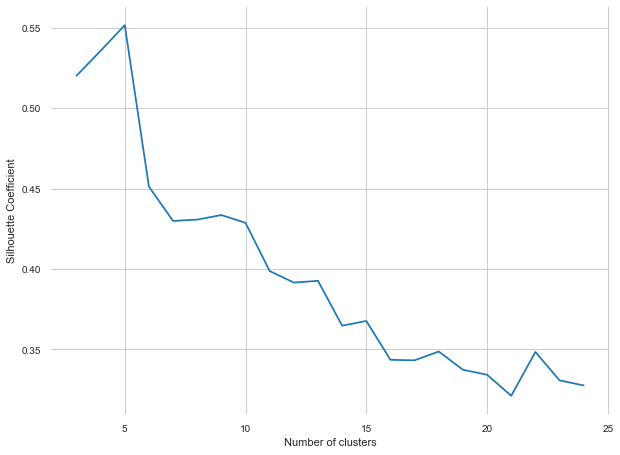

In [91]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

Based on the above scores and plot , we can see that 21 is having the least Cofficient. i.e most scattered cluster 
Hence , we will consider 21 cluster solution. 



In [92]:
# 21 Cluster solution:
km_21 = KMeans(n_clusters=21, random_state=123)
km_21 = km_21.fit(sc_model)

In [93]:
km_21.labels_

array([ 6, 19,  5, ..., 17, 19, 17], dtype=int32)

In [94]:
km_21.cluster_centers_

array([[ 1.08829972e+00, -1.31166782e-01, -1.24073329e-01,
         4.06759620e-02,  3.00209646e+00,  1.54952079e+00],
       [-3.51663421e-01, -1.31166782e-01, -1.24073329e-01,
        -2.39168071e-01, -5.24035142e-01, -5.09906414e-01],
       [ 1.59763399e+00,  1.51058647e+01,  1.46952822e+01,
         1.93567051e+00,  4.83640253e+00,  5.99470368e+00],
       [ 1.44585759e+00, -1.31166782e-01, -1.24073329e-01,
         1.09300148e+00,  9.23828593e-01,  1.71359866e+00],
       [ 1.26169276e+00,  6.35867997e+00,  6.05065813e+00,
         8.95219717e-01,  1.57568089e+00,  2.30539355e+00],
       [ 5.37697221e-01, -1.31166782e-01, -1.24073329e-01,
        -1.85795403e-01,  1.01208830e+00,  4.16270384e-01],
       [-8.89208049e-01, -1.31166782e-01, -1.24073329e-01,
        -3.67229110e-01, -7.37982255e-01, -8.16339047e-01],
       [ 1.69361720e+00, -1.31166782e-01, -1.24073329e-01,
         1.61546364e+01,  6.37855239e-01,  1.45824754e+00],
       [ 1.42905844e+00,  3.25484022e+00,  2.839

In [95]:
# count the values in each cluters
pd.Series(km_21.labels_).value_counts()

6     566
17    498
1     422
12    314
16    287
19    251
11    238
5     174
14    140
3      87
0      55
15     49
8      34
9      23
10     22
18     14
4      12
2       6
20      5
7       3
13      1
dtype: int64

From the above results we can see that, cluster 20, 7 and 13 are the least similar providers.

Text(0.5, 0, 'PC_21')

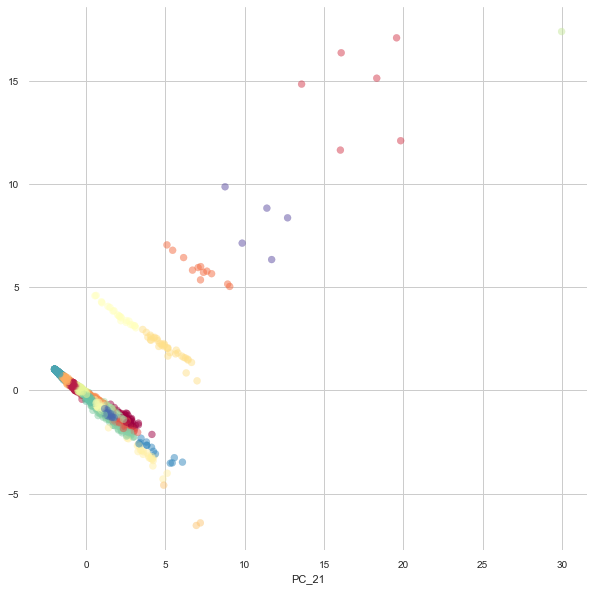

In [96]:
# scatter plot 
plt.figure(figsize=(10,10))
plt.scatter(pca_model[:,0], pca_model[:,1], c=km_21.labels_,alpha=0.5, cmap='Spectral')
plt.xlabel('PC_21')

In [97]:
cluster_df_21=pd.concat([Provider_Charge_group, pd.Series(km_21.labels_, name='Cluster_21')], axis=1)

cluster_df_21.to_csv('cluster_df_21.csv')

In [98]:
pd.read_csv('cluster_df_21.csv')

,Unnamed: 0,Provider,Procedure,State,Region,Service_Count,Charges,Payments,Cluster_21
0,0,ABBEVILLE GENERAL HOSPITAL,25,1,1,1294,314058.89,121115.80,6
1,1,ABBOTT NORTHWESTERN HOSPITAL,121,1,1,20810,4495571.85,1065438.89,19
2,2,ABILENE REGIONAL MEDICAL CENTER,71,1,1,7285,3613719.38,516580.33,5
3,3,ABINGTON MEMORIAL HOSPITAL,121,1,1,19300,6832266.25,1027582.36,0
4,4,ACMH HOSPITAL,54,1,1,4151,406719.05,199332.50,1
...,...,...,...,...,...,...,...,...,...
3196,3196,YAVAPAI REGIONAL MEDICAL CENTER-EAST,34,1,1,2110,542078.31,201164.86,6
3197,3197,YORK HOSPITAL,122,2,2,35048,3139751.07,1394482.57,8
3198,3198,YUKON KUSKOKWIM DELTA REG HOSPITAL,6,1,1,137,45876.15,59637.34,17
3199,3199,YUMA REGIONAL MEDICAL CENTER,102,1,1,11556,3161874.81,901111.74,19


Based on the above scatter plot and csv generated based on this, we can see that these are the list of provider with least similarity.

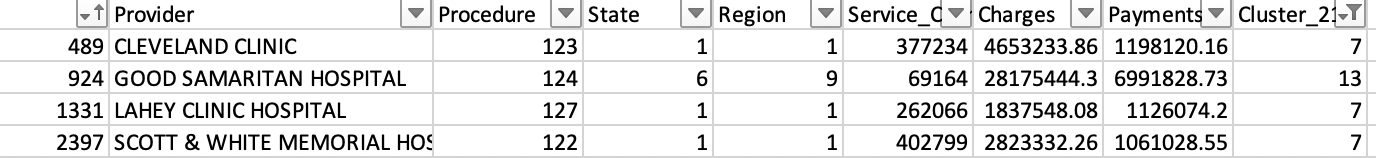

************************************
********************************

##### Part 2B : Find three regions that are least similar to other region



In [118]:
Provider_Charge.head()

,Procedure,Provider,State,Region,Service_Count,Charges,Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,91,32963.08,5777.24
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MARSHALL MEDICAL CENTER SOUTH,AL,AL - Birmingham,14,15131.86,5787.57
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ELIZA COFFEE MEMORIAL HOSPITAL,AL,AL - Birmingham,24,37560.38,5434.96
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ST VINCENT'S EAST,AL,AL - Birmingham,25,13998.28,5417.56
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,SHELBY BAPTIST MEDICAL CENTER,AL,AL - Birmingham,18,31633.28,5658.33


In [119]:
# Group the data based on Regions

Provider_Charge_region= Provider_Charge.groupby('Region').agg({'Procedure':'nunique',
                                        'State':'nunique',
                                        'Region':'nunique',
                                         'Service_Count':'sum',
                                         'Charges':'sum',
                                         'Payments':'sum'
                                        }).reset_index(drop= True)

In [120]:
Provider_Charge_region.head()

,Procedure,State,Region,Service_Count,Charges,Payments
0,100,1,1,31406,9427445.52,3390445.95
1,127,2,1,166237,68364063.11,14648212.20
2,122,3,1,43700,9561883.16,2419670.08
3,125,2,1,71691,11754072.47,3090569.68
4,125,2,1,70394,16193817.95,4256181.67


In [121]:
# Before applying the algorithm , standardize the data (so that all the values are in the same scale )using StandardScaler or MinMaxScaler
# select the colums which needs to be used
Provider_Charge_region_numerical= Provider_Charge_region.select_dtypes(include= ['int', 'float']).copy()

In [122]:
Provider_Charge_region_numerical.head(2)

,Procedure,State,Region,Service_Count,Charges,Payments
0,100,1,1,31406,9427445.52,3390445.95
1,127,2,1,166237,68364063.11,14648212.20


In [125]:
sc_region= StandardScaler()

In [126]:
sc_model_region= sc.fit_transform(Provider_Charge_region_numerical)
sc_model_region

array([[-1.74349159, -0.57947894,  0.        , -0.54870147, -0.40299361,
        -0.32131729],
       [ 0.71004742,  1.19372661,  0.        ,  0.44130553,  1.96336381,
         1.66598482],
       [ 0.25568834,  2.96693215,  0.        , -0.45843183, -0.39759582,
        -0.49268565],
       ...,
       [ 0.52830379,  1.19372661,  0.        , -0.02224604, -0.41811214,
        -0.34818004],
       [ 0.6191756 ,  2.96693215,  0.        , -0.41888471, -0.4719957 ,
        -0.31527195],
       [-2.74308156, -0.57947894,  0.        , -0.72784566, -0.63891564,
        -0.69720297]])

In [127]:
# Now apply PCA, as we dont know the number of PCs will go with the same # of components as Columns.
pca_model_region = PCA(n_components=6)

In [129]:
# fit the standardize model
pca_model_region= pca_model_region.fit(sc_model_region)  

In [130]:
pca_model_region.explained_variance_

array([2.83994063e+00, 1.02817514e+00, 6.60236897e-01, 4.24629089e-01,
       6.34116927e-02, 1.59323012e-34])

In [131]:
# check the variance ratio
pca_model_region.explained_variance_ratio_

array([5.66131955e-01, 2.04963018e-01, 1.31615852e-01, 8.46482825e-02,
       1.26408930e-02, 3.17604698e-35])

In [132]:
# Find the cumulative ratio
np.cumsum(pca_model_region.explained_variance_ratio_)

array([0.56613195, 0.77109497, 0.90271082, 0.98735911, 1.        ,
       1.        ])

In [145]:
# based on the above cumulative sum, we can see that 4 clusters are defining approx 98% of the data. So wll go with
# 4 PCs.
pca_model_region= PCA(n_components=4)
pca_model_region= pca_model_region.fit_transform(sc_model_region)

In [146]:
PCs = pd.DataFrame(pca_model_region, columns = ['PC1','PC2','PC3','PC4'])

In [147]:
PCs

,PC1,PC2,PC3,PC4
0,-1.405874,-0.878854,1.073991,0.161310
1,2.602807,0.646814,0.821657,-0.941268
2,-0.250879,2.992892,0.661846,-0.097388
3,-0.148612,1.391604,-0.178619,-0.095522
4,0.055610,1.327743,-0.075045,-0.216482
...,...,...,...,...
301,-1.295288,-0.491190,0.065815,0.193873
302,0.031865,-0.303049,-0.798812,-0.087425
303,-0.076064,1.388307,-0.210463,0.146819
304,-0.030616,3.085493,0.375802,-0.128025


In [148]:
pca_model_region.shape

(306, 4)

#### Clustering

In [149]:
# Lets go with basic cluters as 3.
km_3 = KMeans(n_clusters=3, random_state=123)
km_3 = km_3.fit(sc_model_region)

In [150]:
km_3.cluster_centers_

array([[-0.26924631, -0.56147685,  0.        , -0.32225923, -0.31654785,
        -0.3687594 ],
       [ 0.76976318, -0.07284878,  0.        ,  1.80488565,  2.00346085,
         2.1451184 ],
       [ 0.35270015,  1.52919792,  0.        ,  0.00424419, -0.10488112,
        -0.0328857 ]])

In [151]:
km_3.labels_

array([0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2,
       0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 1, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0,

In [153]:
# As we dont know how many clusters should get formred to give the optimum solution, We will use Silhoutte score to 
# decide the number of clusters.

# Choosing best solution (optimal solution) - Identifying best value of K
# #Metrics:  Silhoutte coeficient	between -1 & 1	
# #		Closer to 1, segmentation is good	
# #		closer to -1, segmentation is bad	

# calculate SC for K=3 through K=20
k_range = range(3, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(sc_model_region)
    scores.append(silhouette_score(sc_model_region, km.labels_))

In [154]:
scores

[0.4054458042175905,
 0.4258766482073263,
 0.44274346860552116,
 0.43913925606617016,
 0.4346658244029413,
 0.39702590360839496,
 0.4171784867395391,
 0.38234738166904847,
 0.3834997815374063,
 0.3647916364433576,
 0.34479726532509936,
 0.340162422821715,
 0.3293898332584592,
 0.33249185736618553,
 0.3347982449614585,
 0.35204315501392747,
 0.3433745749170961]

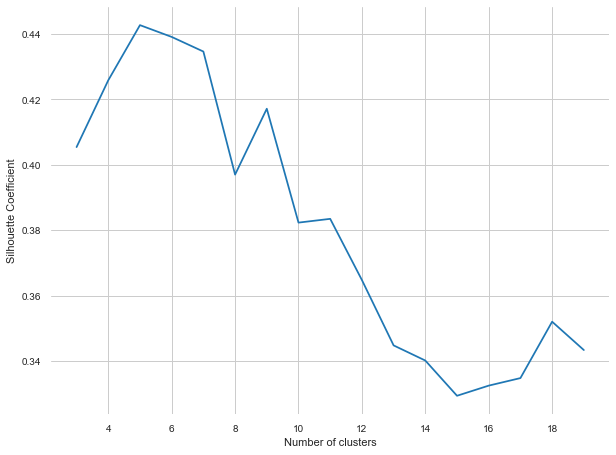

In [155]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

Based on the above scores and plot , we can see that 15 is having the least Cofficient. i.e most scattered cluster 
Hence , we will consider 15 cluster solution. 


In [156]:
# 15 Cluster solution:
km_15 = KMeans(n_clusters=15, random_state=123)
km_15 = km_15.fit(sc_model_region)

In [157]:
km_15.labels_

array([ 4, 14, 10,  2,  2,  5,  5,  2,  2,  1,  0, 10,  5, 14,  0, 13, 13,
        5,  5,  5,  5,  9,  5,  4,  1,  5,  0,  1,  0,  1,  1,  1, 13, 12,
       13,  4,  4,  4,  0,  5, 12,  5, 14,  2,  4,  0,  4,  5, 13,  6, 14,
       10,  0,  5,  1, 13,  5,  5,  6,  0,  8,  5,  8,  5,  0,  6,  5,  5,
        2, 13,  4,  8,  2,  2,  5,  2,  2,  0,  0,  2,  5,  4,  5,  0,  4,
        0,  2,  4,  4,  4, 13,  7,  5, 13,  5,  5,  1, 13, 13, 13,  0, 10,
        2,  5,  1,  4,  0,  5,  5,  5,  5, 13,  0,  1,  6,  0,  2,  0,  5,
        4,  5,  4,  5,  0,  5,  2, 12, 11,  5, 13,  1,  2,  4,  5,  6, 13,
        5,  1,  5,  5,  5,  5,  4,  4,  4,  5, 13,  5,  4,  5,  5, 14,  5,
        5,  5,  0, 13, 10, 14,  2, 14,  0,  5, 13,  2,  4,  2,  2,  4,  4,
       13, 14,  6,  5,  5,  0, 13,  5,  6,  4,  2,  4, 12,  5,  6,  2, 13,
        8,  6,  2, 13,  1,  5,  2, 10, 14,  5, 10,  0, 13,  5,  8,  0,  8,
       13, 13, 13,  5,  0,  6,  7,  1, 13,  0,  5,  6,  2,  0,  1,  6, 12,
        0,  2,  6,  4,  6

In [158]:
km_15.cluster_centers_

array([[-0.46906979, -0.57947894,  0.        , -0.52564094, -0.51452407,
        -0.59354166],
       [ 0.65659341, -0.57947894,  0.        ,  0.85147614,  1.06714953,
         1.17462345],
       [ 0.12306461,  1.19372661,  0.        , -0.28561991, -0.36421037,
        -0.37835323],
       [ 0.89179105,  1.19372661,  0.        ,  2.34839306,  6.14700387,
         3.82358565],
       [-1.75228564, -0.46507858,  0.        , -0.61730506, -0.58762829,
        -0.65397511],
       [ 0.27992083, -0.57947894,  0.        , -0.38834948, -0.305229  ,
        -0.37971199],
       [ 0.76744015,  1.19372661,  0.        ,  0.43716316,  0.2025681 ,
         0.37624911],
       [ 0.95237226, -0.57947894,  0.        ,  3.67782782,  1.16305104,
         1.74547728],
       [ 0.78956026, -0.13617755,  0.        ,  1.67196733,  2.92951041,
         3.02827401],
       [ 0.98266287, -0.57947894,  0.        ,  2.9288458 ,  9.29922232,
         7.39742401],
       [ 0.40714137,  3.11469928,  0.        , -0.

In [159]:
# count the values in each cluters
pd.Series(km_15.labels_).value_counts()

5     75
0     41
13    39
2     37
4     31
6     19
1     17
14    12
10    12
12     9
8      8
7      3
11     1
9      1
3      1
dtype: int64

From the above results we can see that, cluster 11,9 and 3 are the least similar regions.

Text(0.5, 0, 'PC_15')

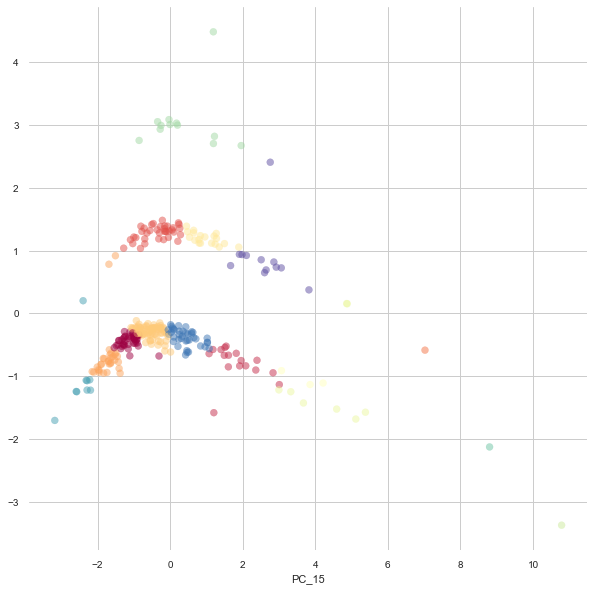

In [163]:
# scatter plot 
plt.figure(figsize=(10,10))
plt.scatter(pca_model_region[:,0], pca_model_region[:,1], c=km_15.labels_,alpha=0.5, cmap='Spectral')
plt.xlabel('PC_15')

In [166]:
cluster_df_15=pd.concat([Provider_Charge_group, pd.Series(km_15.labels_, name='Cluster_15')], axis=1)

cluster_df_15.to_csv('cluster_df_15.csv')

In [167]:
pd.read_csv('cluster_df_15.csv')

,Unnamed: 0,Provider,Procedure,State,Region,Service_Count,Charges,Payments,Cluster_15
0,0,ABBEVILLE GENERAL HOSPITAL,25,1,1,1294,314058.89,121115.80,4.0
1,1,ABBOTT NORTHWESTERN HOSPITAL,121,1,1,20810,4495571.85,1065438.89,14.0
2,2,ABILENE REGIONAL MEDICAL CENTER,71,1,1,7285,3613719.38,516580.33,10.0
3,3,ABINGTON MEMORIAL HOSPITAL,121,1,1,19300,6832266.25,1027582.36,2.0
4,4,ACMH HOSPITAL,54,1,1,4151,406719.05,199332.50,2.0
...,...,...,...,...,...,...,...,...,...
3196,3196,YAVAPAI REGIONAL MEDICAL CENTER-EAST,34,1,1,2110,542078.31,201164.86,NaN
3197,3197,YORK HOSPITAL,122,2,2,35048,3139751.07,1394482.57,NaN
3198,3198,YUKON KUSKOKWIM DELTA REG HOSPITAL,6,1,1,137,45876.15,59637.34,NaN
3199,3199,YUMA REGIONAL MEDICAL CENTER,102,1,1,11556,3161874.81,901111.74,NaN


Based on the above scatter plot and csv generated based on this, we can see that these are the list of provider with least similarity.

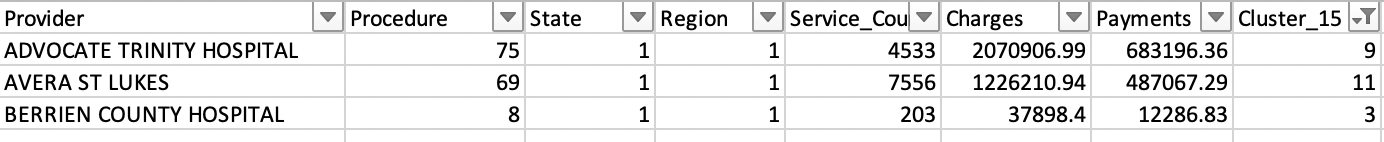